In [228]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from random import random

In [229]:
time_steps = 11

n = 20
p = 3  # place p files "pattern<i>.png" that are n x n images or bigger
U = 0  # threshold for all BTU's
T = 45 # network temperature


In [230]:
def binary_threshold(a, thresh=0):
    return np.where(a > thresh, 1, -1)

def show_binary_image(img):
    img = np.where(img > 0, 255, 0)
    plt.imshow(img)
    
def px_to_ind(x, y):
    return x * n + y

def ind_to_px(i):
    return i // n, i % n

In [231]:
network = np.zeros(shape=(time_steps, n, n), dtype=np.int8)
patterns = np.zeros(shape=(p, n, n), dtype=np.int8)

for i in range(p):
    filename = "pattern" + str(i) + ".png"
    img = Image.open(filename).convert('L')
    data = np.array(img, dtype='uint8')[:n, :n]
    
    patterns[i, : , :] = data

patterns = np.where(patterns == 0, 1, -1)
#show_binary_image(patterns[5])

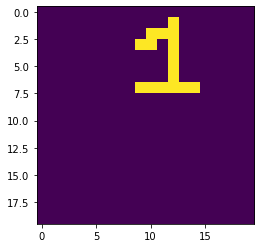

In [232]:
show_binary_image(patterns[1])

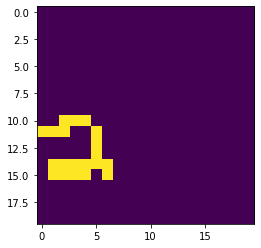

In [233]:
show_binary_image(patterns[2])

In [234]:
# Populate synaptic strengths
synapses = np.zeros(shape=(n*n, n*n), dtype=np.int32)

# constants
epsilon = 1
alpha = 5
beta = 5

for i in range(n*n):
    for j in range(n*n):
        xi, yi = ind_to_px(i)
        xj, yj = ind_to_px(j)

        for v in range(p):
            
            # create basins of attraction
            synapses[i, j] += epsilon * patterns[v, xi, yi] * patterns[v, xj, yj]

            # transition forward excitation
            if v > 0:
                synapses[i, j] += alpha * patterns[v-1, xi, yi] * patterns[v, xj, yj]

            # transition backward inhibition
            if v < p-1:
                synapses[i, j] -= beta * patterns[v+1, xi, yi] * patterns[v, xj, yj]


print(np.sum(synapses < 0) / n**4, "of the connections are negative")

0.06836875 of the connections are negative


Time step: 1
Time step: 2
Time step: 3
Time step: 4
Time step: 5
Time step: 6
Time step: 7
Time step: 8
Time step: 9
Time step: 10


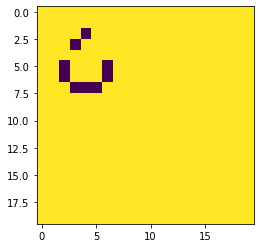

In [235]:
def sigmoidal(x, U, T):
    return 1 / (1 + np.exp(-x - U) / T)

def update(network, t, prob=0.5):
    for x in range(n):
        for y in range(n):
            for x_neigh in range(n):
                for y_neigh in range(n):
                    network[t+1, x, y] += synapses[px_to_ind(x,y), px_to_ind(x_neigh, y_neigh)] * network[t, x_neigh, y_neigh]
            f = sigmoidal(network[t+1, x, y], U, T)
            if f > random():
                network[t+1, x, y] = 1
            else:
                network[t+1, x, y] = -1

    
# init
network[0, :, :] = patterns[0]

for t in range(time_steps-1):
    print("Time step:", t+1)
    update(network, t, prob=update_prob)
    plt.imshow(network[t])
    plt.savefig("time" + str(t) + ".png")

plt.imshow(network[time_steps-1])
plt.savefig("time" + str(time_steps-1) + ".png")